In [1]:

import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import minimize
%matplotlib inline

In [43]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4]
                     ])

In [36]:
check=0
for el in raitings:
    result = 0
    rait=np.delete(raitings,(check), axis = 0)
    elrait=1
    for element in rait:
        a=np.linalg.norm(el)
        b=np.linalg.norm(element)
        cos = np.dot(el,element)/(a*b)
        if cos>result:
            result=cos
            elr=elrait
        elrait+=1
    check+=1
    print('Наибольшее сходство у '+str(check)+' пользователя с '+str(elr)+' пользователем')

Наибольшее сходство у 1 пользователя с 9 пользователем
Наибольшее сходство у 2 пользователя с 4 пользователем
Наибольшее сходство у 3 пользователя с 8 пользователем
Наибольшее сходство у 4 пользователя с 8 пользователем
Наибольшее сходство у 5 пользователя с 9 пользователем
Наибольшее сходство у 6 пользователя с 8 пользователем
Наибольшее сходство у 7 пользователя с 4 пользователем
Наибольшее сходство у 8 пользователя с 6 пользователем
Наибольшее сходство у 9 пользователя с 3 пользователем
Наибольшее сходство у 10 пользователя с 1 пользователем


In [46]:
#Как вариант можно взять средние значения по тройкам фильмов
check=1
sum_=0
new=[]

for elem in raitings:
    newprom=[]
    for el in elem:
        if check==3:
            sum_+=el
            sr=sum_/check
            newprom.append(sr)
            sum_=0
            check=1
        else:
            check+=1
            sum_+=el
    new.append(newprom)
print(new)
        
        

[[5.666666666666667, 3.6666666666666665, 8.666666666666666, 5.666666666666667, 6.666666666666667], [5.333333333333333, 8.333333333333334, 7.0, 3.0, 8.0], [5.0, 7.0, 7.0, 4.333333333333333, 5.0], [5.333333333333333, 7.666666666666667, 3.3333333333333335, 4.333333333333333, 4.0], [4.333333333333333, 7.0, 5.666666666666667, 4.0, 8.0], [6.0, 5.666666666666667, 5.666666666666667, 5.333333333333333, 5.0], [7.0, 8.666666666666666, 2.6666666666666665, 5.333333333333333, 3.6666666666666665], [3.6666666666666665, 5.666666666666667, 3.3333333333333335, 8.0, 4.666666666666667], [7.666666666666667, 8.0, 6.666666666666667, 8.666666666666666, 8.0], [5.333333333333333, 7.333333333333333, 8.333333333333334, 5.666666666666667, 7.0]]


In [47]:
from scipy.misc import derivative
from sympy import *

In [49]:
def f(x):
    return pow(tan(sin(x)+cos(2*x+3)),2)

In [56]:
x=Symbol('x')
x=1

In [59]:
f1=derivative(f,1.0)
f1

57.0653126946030

In [74]:
#Производная на бумаге
2tg(cos(2x+3)+sin(x))*(tg(cos(2x+3)+sin(x))'
(2tg(cos(2x+3)+sin(x)))/(pow(cos(cos(2x+3)+sin(x)),2))*(cos(2x+3)+sin(x))'
proizv=(2(cos(x)-2sin(2x+3))*tg(cos(2x+3)+sin(x)))/pow(cos(cos(2x+3)+sin(x)),2)                       

In [91]:
def z(x):
    return (2*(cos(x)-2*sin(2*x+3))*tan(cos(2*x+3)+sin(x)))/pow(cos(cos(2*x+3)+sin(x)),2) 

In [92]:
func=derivative(z,1.0,n=0)
func

55.3859176353379

In [93]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [94]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [95]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

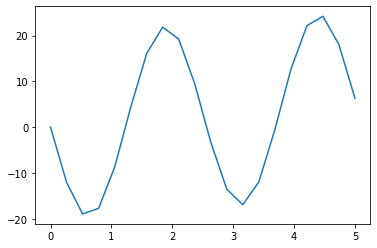

In [96]:
plt.plot(x, fx)
plt.show()

In [97]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

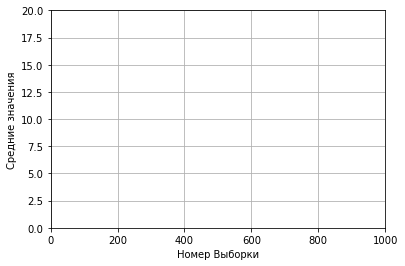

[10.14,
 11.06,
 8.86,
 9.28,
 10.02,
 8.82,
 9.2,
 8.4,
 8.48,
 9.64,
 9.22,
 8.8,
 8.18,
 10.2,
 10.48,
 9.78,
 9.92,
 8.56,
 7.84,
 10.82,
 8.52,
 8.56,
 8.94,
 8.8,
 9.28,
 9.92,
 10.38,
 8.5,
 9.12,
 9.62,
 9.9,
 9.2,
 9.4,
 9.08,
 8.08,
 8.88,
 9.38,
 8.5,
 9.22,
 9.84,
 9.72,
 9.84,
 9.56,
 9.96,
 9.4,
 9.26,
 8.66,
 9.28,
 8.34,
 9.4,
 9.1,
 9.76,
 10.9,
 9.58,
 8.58,
 9.88,
 10.42,
 9.04,
 9.74,
 10.06,
 9.6,
 8.92,
 7.14,
 8.12,
 8.94,
 9.4,
 9.58,
 9.38,
 10.18,
 9.28,
 9.52,
 9.34,
 7.6,
 10.48,
 7.36,
 8.68,
 8.58,
 10.56,
 10.9,
 8.62,
 10.36,
 8.96,
 10.74,
 8.0,
 9.32,
 8.7,
 10.28,
 11.28,
 9.26,
 9.86,
 9.68,
 9.5,
 11.18,
 9.16,
 10.24,
 10.24,
 10.12,
 10.42,
 11.36,
 9.12,
 9.7,
 8.26,
 9.72,
 8.68,
 8.84,
 10.16,
 8.68,
 8.74,
 9.86,
 8.96,
 10.16,
 9.9,
 8.1,
 9.22,
 9.1,
 8.98,
 10.06,
 9.22,
 8.94,
 10.7,
 10.2,
 10.28,
 10.18,
 10.58,
 9.42,
 10.44,
 9.18,
 9.24,
 8.16,
 8.9,
 9.22,
 8.92,
 10.1,
 10.8,
 9.32,
 9.58,
 8.78,
 10.02,
 8.98,
 9.9,
 8.94,
 8.6,
 8

In [127]:
i=1
Summary=[]
for i in range(1000):
    Mas=[]
   
    for a in range(50):
        S=randint(0,20)
        Mas.append(S)
    Sr=sum(Mas)/len(Mas)
    Summary.append(Sr)
plt.hist(Summary,bins=1000)
plt.xlabel('Номер Выборки')
plt.ylabel('Средние значения')
plt.xlim(0,1000)
plt.ylim(0,20)
plt.grid(True)
plt.show()
Summary

In [98]:
from math import *
from numpy.random import randint

In [119]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [120]:
x,z=np.linalg.eig(m)

In [121]:
for i in range(len(x)):
    print("Собственное значение " + str(x[i]))
    print("соответствующий ему собственный вектор " + str(z[:,i]))

Собственное значение 3.0000000000000004
соответствующий ему собственный вектор [0.89442719 0.4472136 ]
Собственное значение -0.9999999999999996
соответствующий ему собственный вектор [-0.89442719  0.4472136 ]
